## Lab 3

```
Alexander Baquiax
PIO | Econometría II
12007988
```


In [69]:
import numpy as np
import pandas as pd

In [70]:
dataset = pd.read_csv('dasetHP.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Agrupación de columnas por tipo de datos

In [71]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Imputación de datos

In [72]:
dataset.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [73]:
dataset_wo_na = dataset.dropna(axis=1).copy() # drop columns with missing values
dataset_wo_na.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [74]:
numeric_cols = [colname for colname in dataset_wo_na.columns if dataset_wo_na[colname].dtype in ['int64', 'float64']]
numeric_cols

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [75]:
len(numeric_cols)

35

In [76]:
categoric_columns = [colname for colname in dataset_wo_na.columns if dataset_wo_na[colname].dtype == 'object']
categoric_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [78]:
for colname in categoric_columns:
    dict = dataset_wo_na[colname].value_counts().to_dict()
    dataset_wo_na[colname] = dataset_wo_na[colname].map(dict)

dataset_wo_na.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151,8450,1454,925,1311,1459,1052,1382,...,0,0,0,0,0,2,2008,1267,1198,208500
1,2,20,1151,9600,1454,925,1311,1459,47,1382,...,0,0,0,0,0,5,2007,1267,1198,181500
2,3,60,1151,11250,1454,484,1311,1459,1052,1382,...,0,0,0,0,0,9,2008,1267,1198,223500
3,4,70,1151,9550,1454,484,1311,1459,263,1382,...,272,0,0,0,0,2,2006,1267,101,140000
4,5,60,1151,14260,1454,484,1311,1459,47,1382,...,0,0,0,0,0,12,2008,1267,1198,250000


### Outliers

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_density_qq(dataset, col):

    plt.figure(figsize=(7, 3))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[col], bins=30)
    plt.title("Histograma y Densisdad")

    plt.subplot(1, 2, 2)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.show()

def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS


def is_normal_dist(dataset, col):
     sesgo = round(dataset[col].skew(), 3)
     kurtosis = round(dataset[col].kurt(), 3)
     normal_sesgo = False
     normal_kurtosis = False
     etiqueta = 'No es Normal'
     normal = False

     if((sesgo >= -0.1) and (sesgo <= 0.1)):
          normal_sesgo = True
     else:
          normal_sesgo = False

     if((kurtosis >= 2.8) and (kurtosis <= 3.2)):
          normal_kurtosis = True
     else:
          normal_kurtosis = False

     if(normal_sesgo and normal_kurtosis):
          etiqueta = 'Es Normal'
          normal = True

     print(f"{col} - Asimetría: {sesgo} - Curtosis: {kurtosis} - {etiqueta}")
     return normal

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


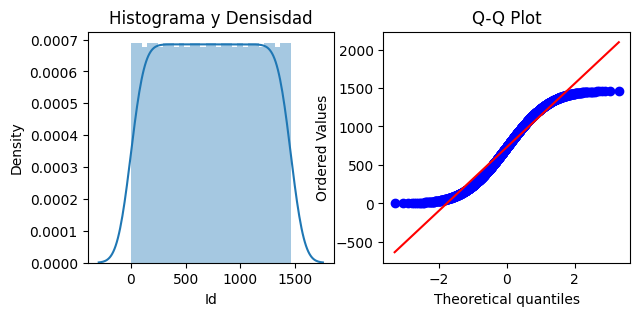

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


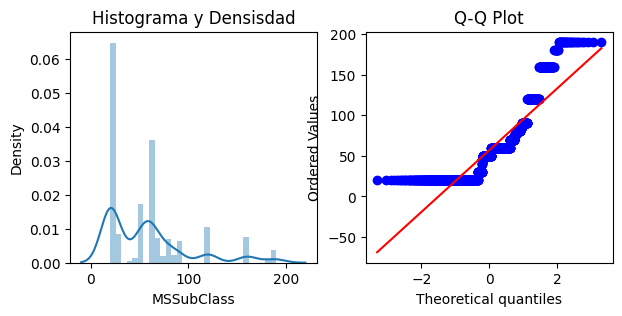

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


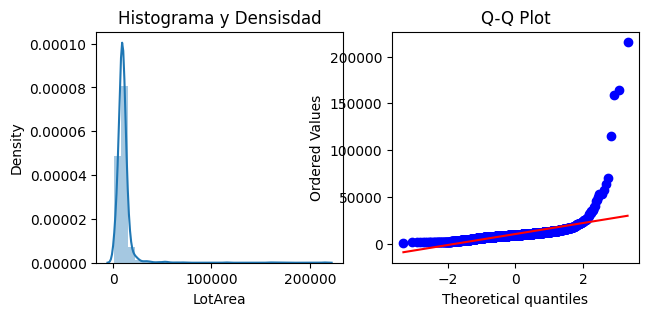

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


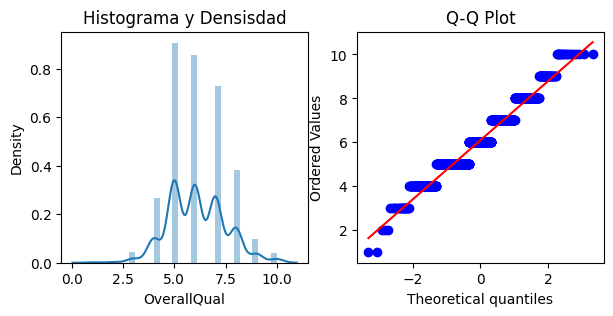

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


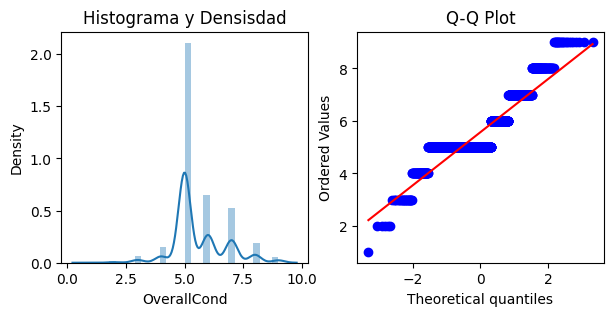

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


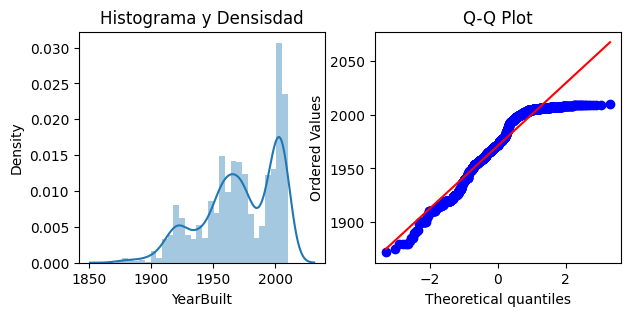

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


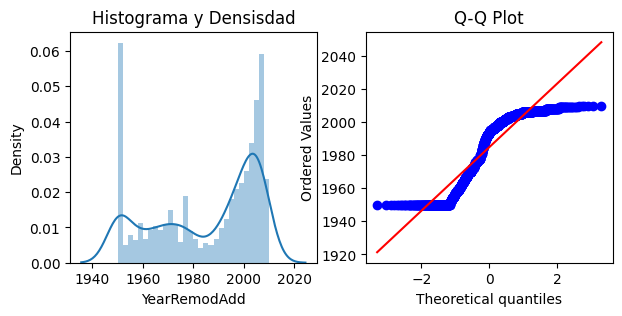

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


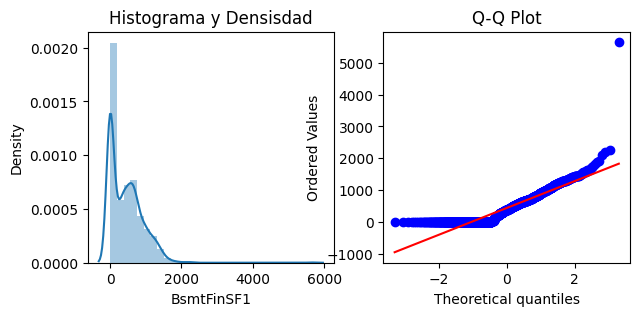

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


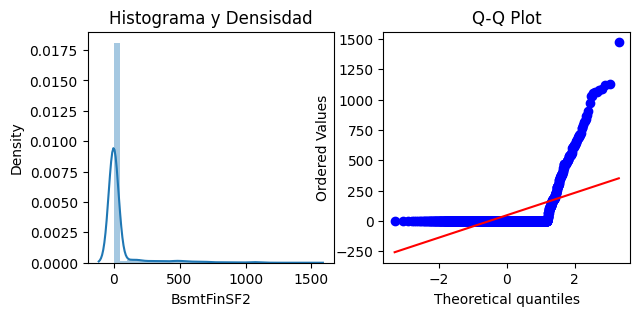

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


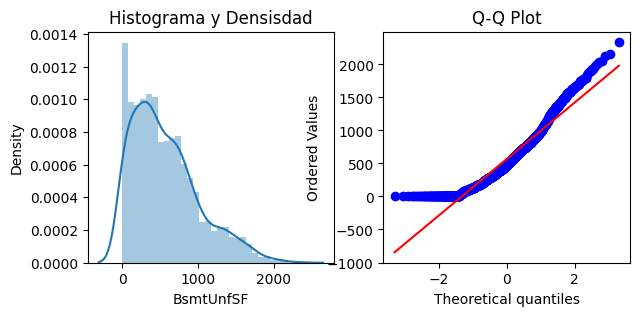

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


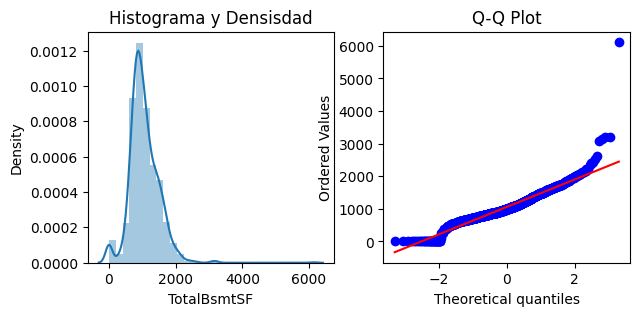

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


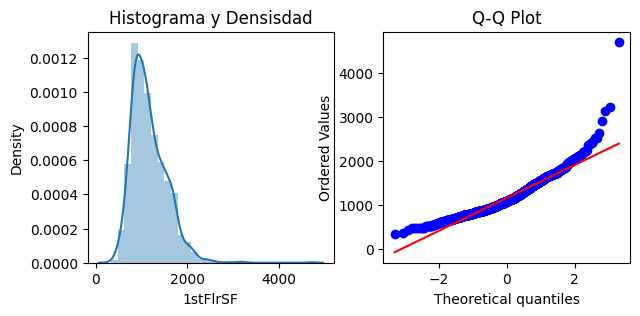

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


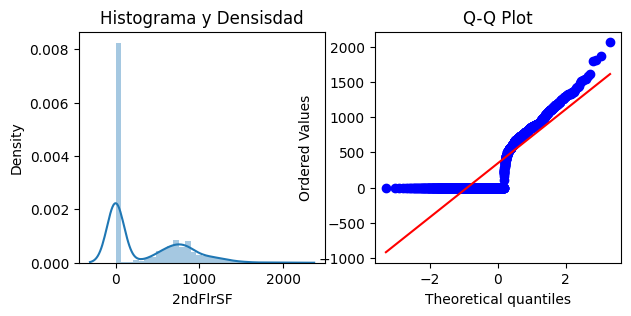

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


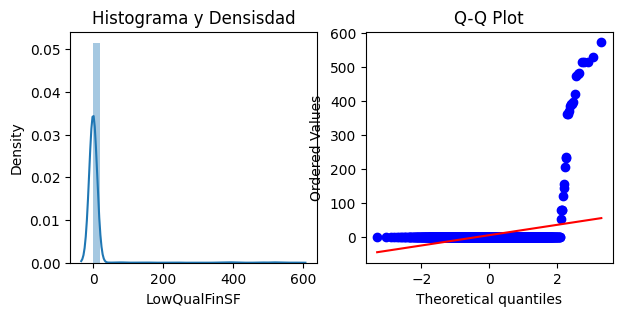

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


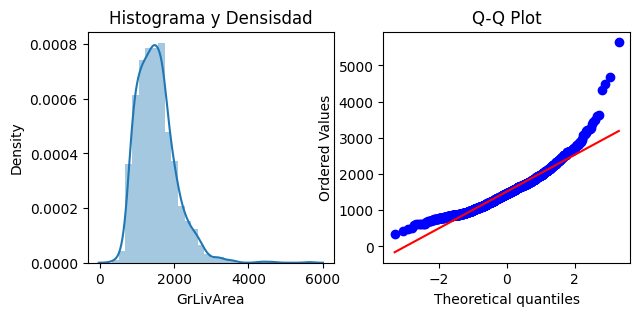

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


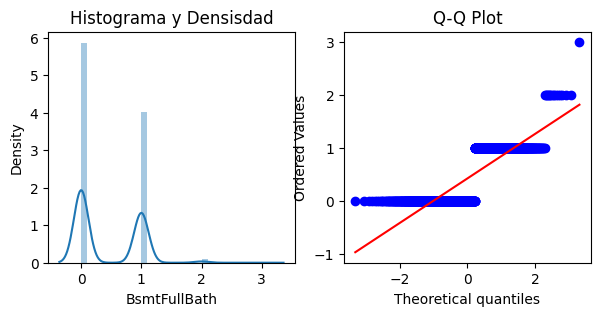

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


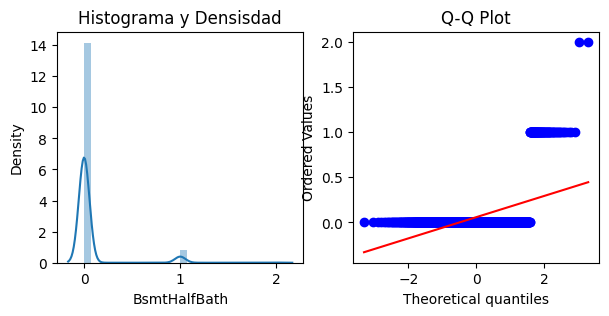

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


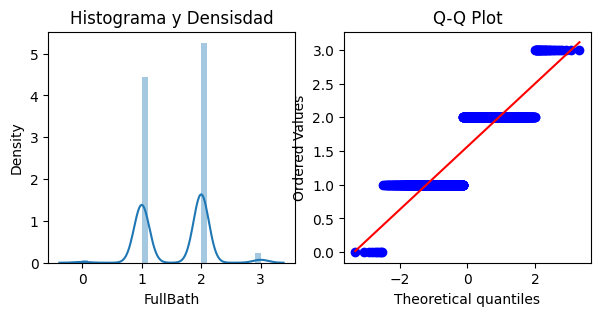

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


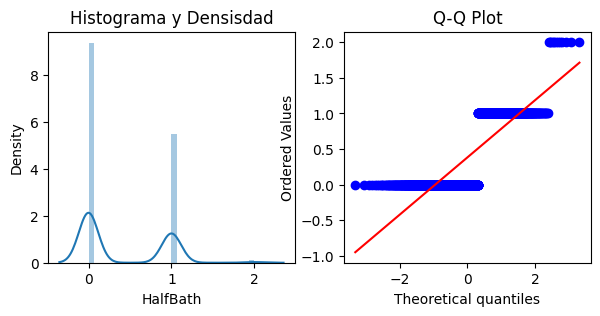

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


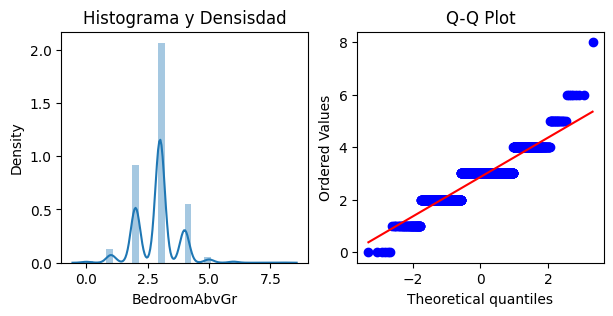

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


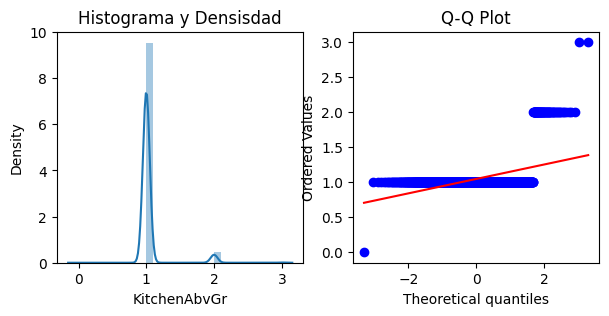

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


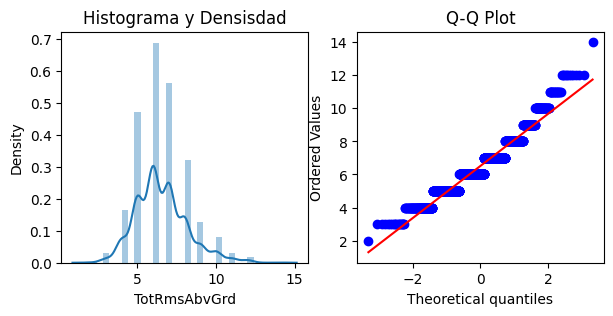

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


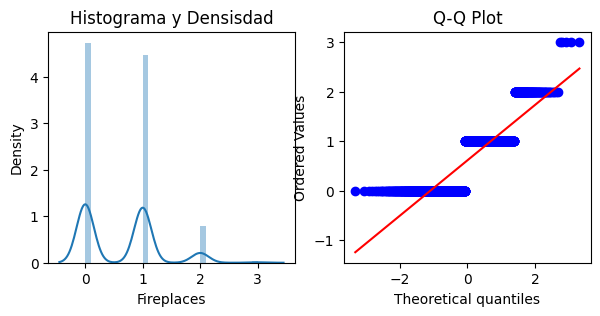

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


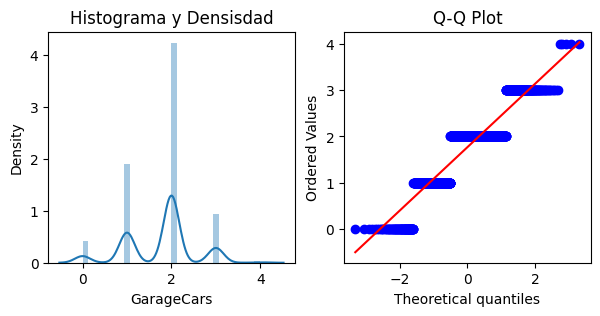

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


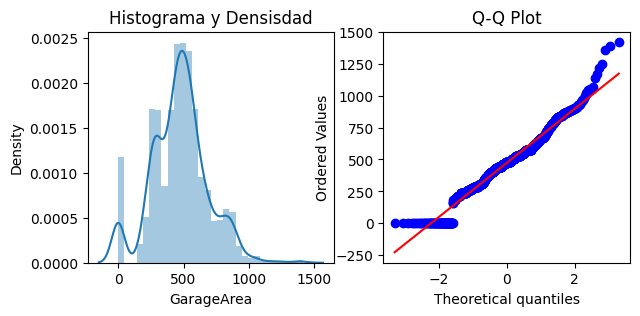

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


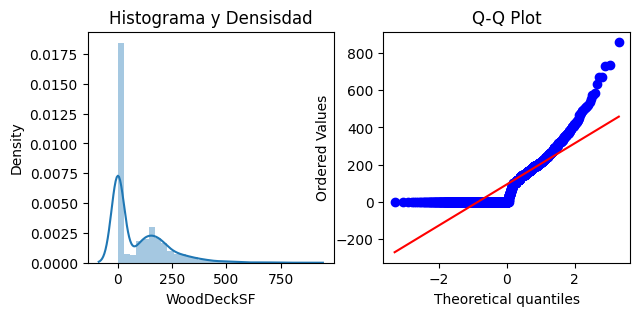

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


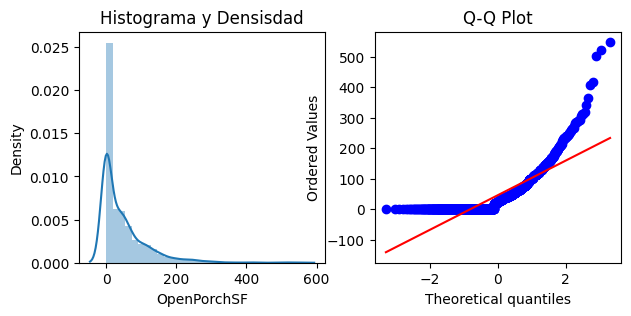

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


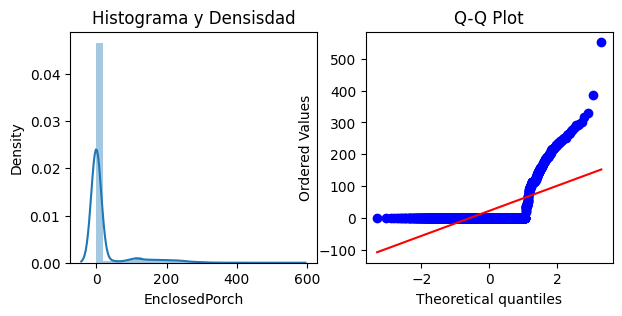

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


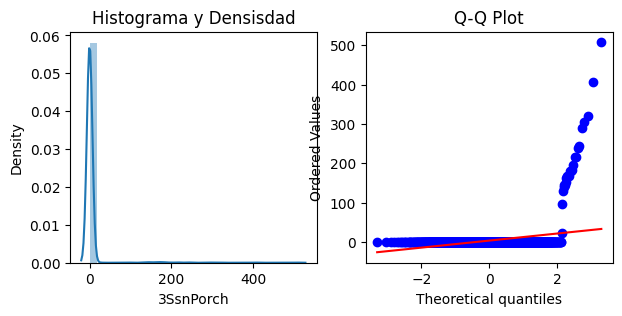

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


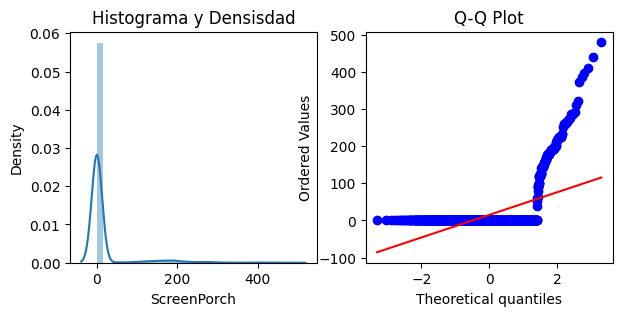

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


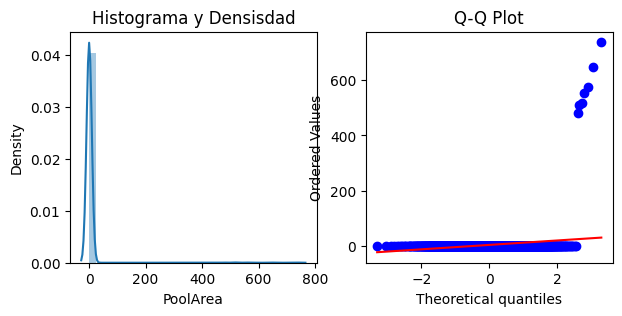

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


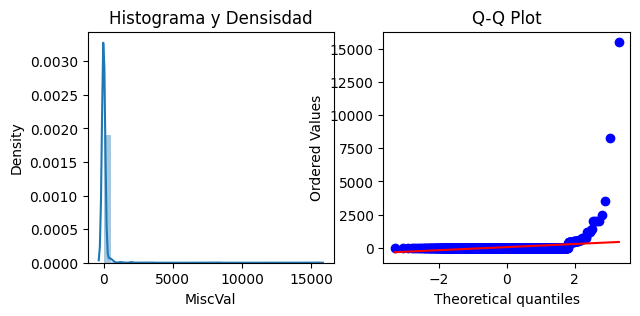

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


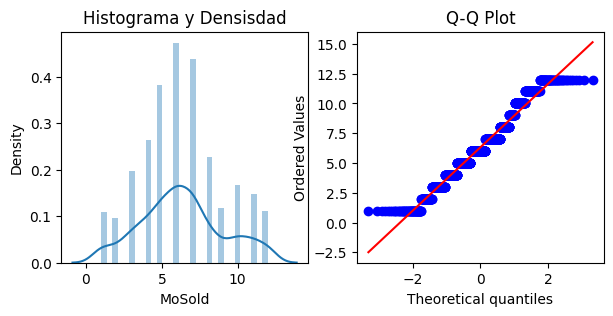

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


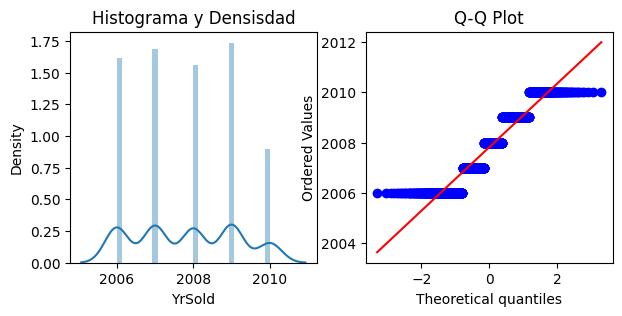

/Users/alex.baquiax/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


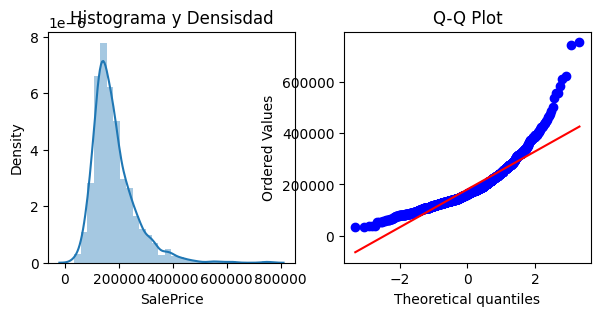

In [85]:
for colname in numeric_cols:
    plot_density_qq(dataset_wo_na, colname)